In [13]:
import warnings

# Ignore all warnings (not recommended unless you know what you are doing)
warnings.filterwarnings("ignore")
import os

File Not found /Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050009_func_preproc.nii.gz
File Not found /Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050017_func_preproc.nii.gz
File Not found /Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050019_func_preproc.nii.gz
File Not found /Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050029_func_preproc.nii.gz
File Not found /Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050055_func_preproc.nii.gz
File Not found /Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050058_func_preproc.nii.gz
File Not found /Users/vinoth/PycharmProjects/paper_implementatio

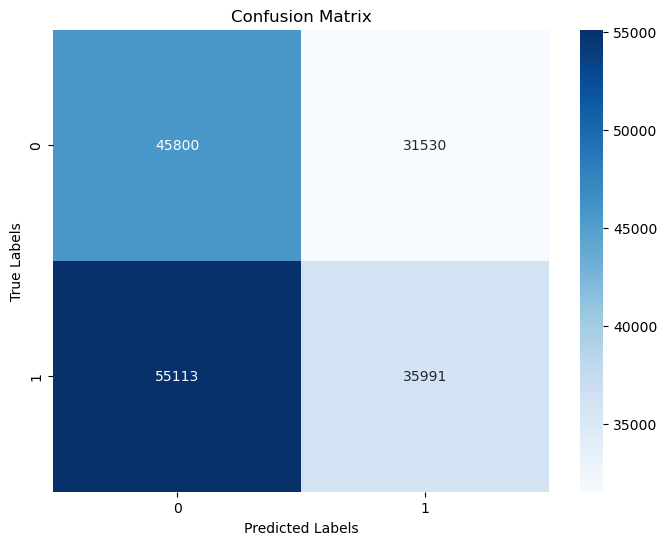

In [18]:
import pandas as pd
import numpy as np
import nibabel as nib
from nilearn import input_data, datasets
import networkx as nx
from fastdtw import fastdtw
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import SpectralClustering
import os

# Load the CSV file
csv_file = pd.read_csv(r"/Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/Phenotypic_V1_0b_preprocessed1.csv")
csv_file['DX_GROUP'].replace({1: 0, 2: 1}, inplace=True)
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
masker = input_data.NiftiLabelsMasker(labels_img=atlas.maps, standardize=True)
mri_dir = r"/Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/"

# Flatten predictions and true labels
flat_predictions = []
flat_true_labels = []

# Iterate through the entire CSV
for idx, row in enumerate(csv_file.itertuples()):
    if row.FILE_ID != "no_filename":
        mri_filename = os.path.join(mri_dir, row.FILE_ID + "_func_preproc.nii.gz")
        try:
            mri_img = nib.load(mri_filename)
        except:
            print("File Not found", mri_filename)
            continue
        time_series = masker.fit_transform(mri_img)
        n_regions, n_time_points = time_series.shape
        distance_matrix = np.zeros((n_regions, n_regions))
        for i in range(n_regions):
            for j in range(i + 1, n_regions):
                distance, _ = fastdtw(time_series[i, :], time_series[j, :])
                distance_matrix[i, j] = distance_matrix[j, i] = distance
        distance_matrix = distance_matrix / distance_matrix.max()
        similarity_matrix = 1 - distance_matrix
        threshold = 0.5
        similarity_matrix[similarity_matrix < threshold] = 0
        G = nx.from_numpy_matrix(similarity_matrix)

        # Apply Spectral Clustering
        spectral_clustering = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=0)
        labels = spectral_clustering.fit_predict(similarity_matrix)

        # Store the flattened predictions and true labels
        flat_predictions.extend(labels)
        flat_true_labels.extend([row.DX_GROUP] * len(labels))


        if idx == 0:  # Visualizations for the first iteration
            # Time series plot
            plt.figure(figsize=(25, 15))
            for i in range(min(n_regions, time_series.shape[0])):
                plt.plot(time_series[i, :], label=f'Region {i + 1}')
            plt.xlabel('Time point')
            plt.ylabel('Blood Oxygen Level(BOLD) - Normalized signal')
            plt.title('Time series of the regions')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            plt.tight_layout()
            plt.show()

            # Graph visualization
            plt.figure(figsize=(25, 15))
            pos = nx.spring_layout(G)
            nx.draw(G, pos, with_labels=True)
            plt.show()

            # Similarity matrix plot
            plt.figure(figsize=(10, 10))
            sns.heatmap(similarity_matrix, square=True)
            plt.show()

# Convert to NumPy arrays
flat_predictions = np.array(flat_predictions)
flat_true_labels = np.array(flat_true_labels)

# Evaluate the clustering
confusion_mat = confusion_matrix(flat_true_labels, flat_predictions)
classification_rep = classification_report(flat_true_labels, flat_predictions)

print("Classification Report:")
print(classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


File Not found /Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050009_func_preproc.nii.gz
File Not found /Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050017_func_preproc.nii.gz
File Not found /Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050019_func_preproc.nii.gz
File Not found /Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050029_func_preproc.nii.gz
File Not found /Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050055_func_preproc.nii.gz
File Not found /Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050058_func_preproc.nii.gz
File Not found /Users/vinoth/PycharmProjects/paper_implementatio

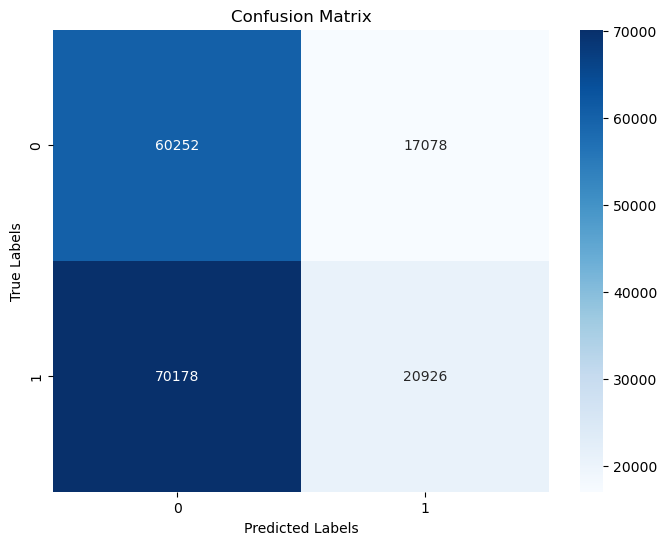

In [19]:
import pandas as pd
import numpy as np
import nibabel as nib
from nilearn import input_data, datasets
import networkx as nx
from fastdtw import fastdtw
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import SpectralClustering
import os

# Load the CSV file
csv_file = pd.read_csv(r"/Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/Phenotypic_V1_0b_preprocessed1.csv")
csv_file['DX_GROUP'].replace({1: 0, 2: 1}, inplace=True)
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
masker = input_data.NiftiLabelsMasker(labels_img=atlas.maps, standardize=True)
mri_dir = r"/Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/"

# Flatten predictions and true labels
flat_predictions = []
flat_true_labels = []

# Iterate through the entire CSV
for idx, row in enumerate(csv_file.itertuples()):
    if row.FILE_ID != "no_filename":
        mri_filename = os.path.join(mri_dir, row.FILE_ID + "_func_preproc.nii.gz")
        try:
            mri_img = nib.load(mri_filename)
        except:
            print("File Not found", mri_filename)
            continue
        time_series = masker.fit_transform(mri_img)
        n_regions, n_time_points = time_series.shape
        distance_matrix = np.zeros((n_regions, n_regions))
        for i in range(n_regions):
            for j in range(i + 1, n_regions):
                distance, _ = fastdtw(time_series[i, :], time_series[j, :])
                distance_matrix[i, j] = distance_matrix[j, i] = distance
        distance_matrix = distance_matrix / distance_matrix.max()
        similarity_matrix = 1 - distance_matrix
        threshold = 0.8
        similarity_matrix[similarity_matrix < threshold] = 0
        G = nx.from_numpy_matrix(similarity_matrix)

        # Apply Spectral Clustering
        spectral_clustering = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=0)
        labels = spectral_clustering.fit_predict(similarity_matrix)

        # Store the flattened predictions and true labels
        flat_predictions.extend(labels)
        flat_true_labels.extend([row.DX_GROUP] * len(labels))


        if idx == 0:  # Visualizations for the first iteration
            # Time series plot
            plt.figure(figsize=(25, 15))
            for i in range(min(n_regions, time_series.shape[0])):
                plt.plot(time_series[i, :], label=f'Region {i + 1}')
            plt.xlabel('Time point')
            plt.ylabel('Blood Oxygen Level(BOLD) - Normalized signal')
            plt.title('Time series of the regions')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            plt.tight_layout()
            plt.show()

            # Graph visualization
            plt.figure(figsize=(25, 15))
            pos = nx.spring_layout(G)
            nx.draw(G, pos, with_labels=True)
            plt.show()

            # Similarity matrix plot
            plt.figure(figsize=(10, 10))
            sns.heatmap(similarity_matrix, square=True)
            plt.show()

# Convert to NumPy arrays
flat_predictions = np.array(flat_predictions)
flat_true_labels = np.array(flat_true_labels)

# Evaluate the clustering
confusion_mat = confusion_matrix(flat_true_labels, flat_predictions)
classification_rep = classification_report(flat_true_labels, flat_predictions)

print("Classification Report:")
print(classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


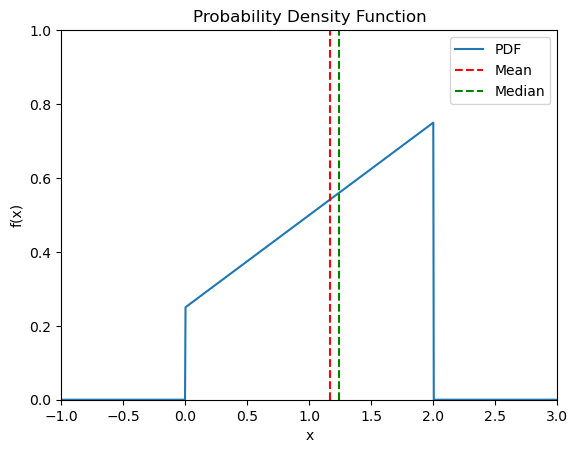

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the PDF function
def f(x):
    return (x / 4 + 1 / 4) if 0 < x < 2 else 0

# Define the range of x values
x = np.linspace(-1, 3, 1000)

# Compute the PDF for each x value
y = [f(xi) for xi in x]

# Define the mean and median
mean = 1.1667
median = 1.236

# Plot the PDF
plt.plot(x, y, label='PDF')

# Plot the mean and median
plt.axvline(x=mean, color='r', linestyle='--', label='Mean')
plt.axvline(x=median, color='g', linestyle='--', label='Median')

# Adding labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability Density Function')
plt.legend()
plt.ylim(0, 1)
plt.xlim(-1, 3)

# Display the plot
plt.show()


In [4]:
from sympy import Piecewise

# Defining the CDF as the integral of the PDF
F_x = integrate(Piecewise((f_x_with_b, (x >= 0) & (x <= 2)), (0, True)), x)

# Solving for the median (m) where the CDF is equal to 1/2
m = symbols('m', real=True)
median_solution = solve(Eq(F_x.subs(x, m), 1/2), m)

F_x, median_solution

NameError: name 'integrate' is not defined

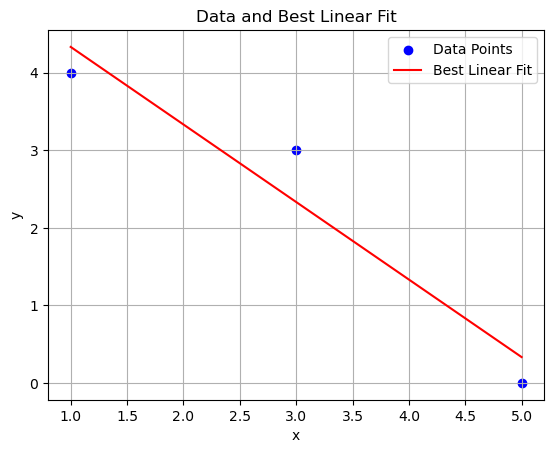

In [3]:
import matplotlib.pyplot as plt

# Data points
x_values = [1, 3, 5]
y_values = [4, 3, 0]

# Best linear fit
beta0 = 5.3333
beta1 = -1
y_fit = [beta0 + beta1 * x for x in x_values]

# Plotting the data points
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plotting the best linear fit
plt.plot(x_values, y_fit, color='red', label='Best Linear Fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data and Best Linear Fit')
plt.grid(True)
plt.show()
